# Data Cleaning and Prep

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
url = 'https://raw.githubusercontent.com/alexdlilly/DS6050_Project/main/predicted%20data.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,Unnamed: 0,index,filename,covid,score,uuid,datetime,cough_detected,SNR,latitude,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,0,0,001d8e33-a4af-4edb-98ba-b03f891d9a6c,1,0.986853,001d8e33-a4af-4edb-98ba-b03f891d9a6c,2020-05-13T01:27:42.552773+00:00,0.0306,12.713480,13.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00357712-dd5a-4c0a-90a4-39f1f4b9d5fd,1,0.005177,00357712-dd5a-4c0a-90a4-39f1f4b9d5fd,2020-04-10T12:48:17.554497+00:00,0.0576,0.000000,46.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,00e0a33c-6561-406e-b543-4c9f07b860f7,1,-0.124921,00e0a33c-6561-406e-b543-4c9f07b860f7,2020-04-15T07:01:51.945775+00:00,0.2798,12.695962,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,01424527-9c3b-4b6e-96f1-9eea3150819b,1,-0.022270,01424527-9c3b-4b6e-96f1-9eea3150819b,2020-10-18T15:51:28.858079+00:00,0.0000,16.047069,48.9,...,no_cough,NaN,False,False,False,False,False,False,NaN,NaN
4,4,4,015576c8-2b03-4dcb-b251-78a984fe86fe,1,-0.116273,015576c8-2b03-4dcb-b251-78a984fe86fe,2020-06-22T00:21:42.091345+00:00,1.0000,12.265701,NaN,...,good,unknown,False,False,False,False,False,True,obstructive_disease,mild


In [4]:
data.columns

Index(['Unnamed: 0', 'index', 'filename', 'covid', 'score', 'uuid', 'datetime',
       'cough_detected', 'SNR', 'latitude', 'longitude', 'age', 'gender',
       'respiratory_condition', 'fever_muscle_pain', 'status', 'quality_1',
       'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1',
       'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1', 'quality_2',
       'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2', 'choking_2',
       'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2', 'quality_3',
       'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3', 'choking_3',
       'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3', 'quality_4',
       'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4', 'choking_4',
       'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

In [5]:
cleaned = data.drop(['Unnamed: 0', 'index', 'filename', 'covid', 'uuid', 'datetime'], axis = 1)
## drop the columns that will not be used in prediction
## dropping covid column -- keeping status column and score column

In [6]:
cleaned.head()

,score,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,0.986853,0.0306,12.713480,13.8,-89.6,NaN,female,False,True,COVID-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.005177,0.0576,0.000000,46.8,6.6,NaN,male,True,False,COVID-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.124921,0.2798,12.695962,NaN,NaN,NaN,other,False,False,COVID-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.022270,0.0000,16.047069,48.9,2.5,39.0,female,False,False,COVID-19,...,no_cough,NaN,False,False,False,False,False,False,NaN,NaN
4,-0.116273,1.0000,12.265701,NaN,NaN,27.0,male,False,False,COVID-19,...,good,unknown,False,False,False,False,False,True,obstructive_disease,mild


In [7]:
cleaned.status.unique()

array(['COVID-19', 'healthy'], dtype=object)

In [8]:
cleaned = cleaned.fillna(method = 'bfill')

Remove nans with backfill

In [9]:
cleaned.head()

,score,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,0.986853,0.0306,12.713480,13.8,-89.6,39.0,female,False,True,COVID-19,...,no_cough,unknown,False,False,False,False,False,False,obstructive_disease,mild
1,0.005177,0.0576,0.000000,46.8,6.6,39.0,male,True,False,COVID-19,...,no_cough,unknown,False,False,False,False,False,False,obstructive_disease,mild
2,-0.124921,0.2798,12.695962,48.9,2.5,39.0,other,False,False,COVID-19,...,no_cough,unknown,False,False,False,False,False,False,obstructive_disease,mild
3,-0.022270,0.0000,16.047069,48.9,2.5,39.0,female,False,False,COVID-19,...,no_cough,unknown,False,False,False,False,False,False,obstructive_disease,mild
4,-0.116273,1.0000,12.265701,41.6,2.0,27.0,male,False,False,COVID-19,...,good,unknown,False,False,False,False,False,True,obstructive_disease,mild


In [10]:
cleaneddummied = pd.get_dummies(cleaned)

In [11]:
cleaneddummied.columns

Index(['score', 'cough_detected', 'SNR', 'latitude', 'longitude', 'age',
       'respiratory_condition', 'fever_muscle_pain', 'gender_female',
       'gender_male',
       ...
       'nothing_4_True', 'diagnosis_4_COVID-19', 'diagnosis_4_healthy_cough',
       'diagnosis_4_lower_infection', 'diagnosis_4_obstructive_disease',
       'diagnosis_4_upper_infection', 'severity_4_mild',
       'severity_4_pseudocough', 'severity_4_severe', 'severity_4_unknown'],
      dtype='object', length=119)

In [12]:
cleaneddummied.head()

,score,cough_detected,SNR,latitude,longitude,age,respiratory_condition,fever_muscle_pain,gender_female,gender_male,...,nothing_4_True,diagnosis_4_COVID-19,diagnosis_4_healthy_cough,diagnosis_4_lower_infection,diagnosis_4_obstructive_disease,diagnosis_4_upper_infection,severity_4_mild,severity_4_pseudocough,severity_4_severe,severity_4_unknown
0,0.986853,0.0306,12.713480,13.8,-89.6,39.0,False,True,True,False,...,False,False,False,False,True,False,True,False,False,False
1,0.005177,0.0576,0.000000,46.8,6.6,39.0,True,False,False,True,...,False,False,False,False,True,False,True,False,False,False
2,-0.124921,0.2798,12.695962,48.9,2.5,39.0,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,-0.022270,0.0000,16.047069,48.9,2.5,39.0,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
4,-0.116273,1.0000,12.265701,41.6,2.0,27.0,False,False,False,True,...,True,False,False,False,True,False,True,False,False,False


In [13]:
cleaneddummied.rename(columns = {'status_COVID-19':'statusCOVID19'}, inplace=True)

In [14]:
cleaneddummied.columns.tolist()

['score',
 'cough_detected',
 'SNR',
 'latitude',
 'longitude',
 'age',
 'respiratory_condition',
 'fever_muscle_pain',
 'gender_female',
 'gender_male',
 'gender_other',
 'statusCOVID19',
 'status_healthy',
 'quality_1_good',
 'quality_1_no_cough',
 'quality_1_ok',
 'quality_1_poor',
 'cough_type_1_dry',
 'cough_type_1_unknown',
 'cough_type_1_wet',
 'dyspnea_1_False',
 'dyspnea_1_True',
 'wheezing_1_False',
 'wheezing_1_True',
 'stridor_1_False',
 'choking_1_False',
 'congestion_1_False',
 'congestion_1_True',
 'nothing_1_False',
 'nothing_1_True',
 'diagnosis_1_COVID-19',
 'diagnosis_1_healthy_cough',
 'diagnosis_1_lower_infection',
 'diagnosis_1_obstructive_disease',
 'diagnosis_1_upper_infection',
 'severity_1_mild',
 'severity_1_pseudocough',
 'severity_1_severe',
 'severity_1_unknown',
 'quality_2_good',
 'quality_2_no_cough',
 'quality_2_ok',
 'quality_2_poor',
 'cough_type_2_dry',
 'cough_type_2_unknown',
 'cough_type_2_wet',
 'dyspnea_2_False',
 'dyspnea_2_True',
 'wheezing_2

## What is the AUC if you use only the `score` data from the spectrograms to predict COVID status? 

In [15]:
score = roc_auc_score(cleaneddummied.statusCOVID19, cleaneddummied.score)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.6886


In [16]:
fpr1, tpr1, thresh1 = roc_curve(cleaneddummied.statusCOVID19, cleaneddummied.score)


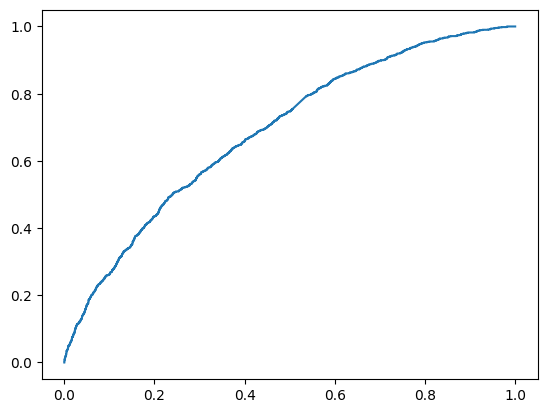

In [17]:
import matplotlib.pyplot as plt

plt.plot(fpr1, tpr1)

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
#cleaneddummied = cleaneddummied[['score','SNR','age','respiratory_condition','fever_muscle_pain','gender_female','gender_male','gender_other','statusCOVID19','status_healthy']]

In [19]:
y = cleaneddummied.statusCOVID19

In [20]:
x = cleaneddummied[cleaneddummied.columns.drop(list(cleaneddummied.filter(regex='diagnosis')))]
x = x.drop(['statusCOVID19', 'status_healthy'], axis=1)

In [21]:
np.all(np.isfinite(x))

False

In [22]:
np.isinf(x).values.sum()

5

In [23]:
x.columns.to_series()[np.isinf(x).any()]

SNR    SNR
dtype: object

Set all infinity values to the max real value

In [24]:
x.SNR.quantile(q=.999)

83.53848954151096

In [25]:
x.SNR[5447] = 100

C:\Users\alexa\AppData\Local\Temp\ipykernel_30852\2340595035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.SNR[5447] = 100


In [26]:
x.SNR[6252] = 100

C:\Users\alexa\AppData\Local\Temp\ipykernel_30852\3736724814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.SNR[6252] = 100


In [27]:
x.SNR[7972] = 100

C:\Users\alexa\AppData\Local\Temp\ipykernel_30852\206539196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.SNR[7972] = 100


In [28]:
x.SNR[9124] = 100

C:\Users\alexa\AppData\Local\Temp\ipykernel_30852\395024427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.SNR[9124] = 100


In [29]:
x.SNR[11716] = 100

C:\Users\alexa\AppData\Local\Temp\ipykernel_30852\523694619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.SNR[11716] = 100


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=777
)

In [31]:
model = LogisticRegression(solver='liblinear', random_state=777)

In [32]:
model.fit(X_train,y_train)

LogisticRegression(random_state=777, solver='liblinear')

In [33]:
model.score(X_test,y_test)

0.9149338374291115

In [34]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")



In [35]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9149338374291115
F1 Score: 0.94479691937079


In [36]:
confusion_matrix(y_test, model.predict(X_test))

array([[3844,   26],
       [ 334,   28]], dtype=int64)

In [37]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.92      0.99      0.96      3870
        True       0.52      0.08      0.13       362

    accuracy                           0.91      4232
   macro avg       0.72      0.54      0.54      4232
weighted avg       0.89      0.91      0.89      4232



In [38]:
y_proba = model.predict_proba(X_test)

In [39]:
score = roc_auc_score(y_test, y_proba[:, 1])
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.7509


Huge improvement from 0.68!

Increasing regularization

In [40]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=777)
model.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=777, solver='liblinear')

In [41]:
model.score(X_test,y_test)

0.9146975425330813

In [42]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9146975425330813
F1 Score: 0.9448173476923631


In [43]:
confusion_matrix(y_test, model.predict(X_test))

array([[3844,   26],
       [ 335,   27]], dtype=int64)

In [44]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.92      0.99      0.96      3870
        True       0.51      0.07      0.13       362

    accuracy                           0.91      4232
   macro avg       0.71      0.53      0.54      4232
weighted avg       0.88      0.91      0.88      4232



In [45]:
y_proba = model.predict_proba(X_test)

In [46]:
score_glm = roc_auc_score(y_test, y_proba[:, 1])
print(f"ROC AUC: {score_glm:.4f}")

ROC AUC: 0.7506


In [47]:
fpr_glm, tpr_glm, thresh1 = roc_curve(y_test, y_proba[:, 1])

## Naive Bayes Classification

In [48]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [49]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8700378071833649
F1 Score: 0.8668294094352292


In [50]:
confusion_matrix(y_test, model.predict(X_test))

array([[3574,  296],
       [ 254,  108]], dtype=int64)

In [51]:
y_proba = model.predict_proba(X_test)

In [52]:
score_NB = roc_auc_score(y_test, y_proba[:, 1])
print(f"ROC AUC: {score_NB:.4f}")

ROC AUC: 0.7403


In [53]:
fpr_NB, tpr_NB, thresh1 = roc_curve(y_test, y_proba[:, 1])

## LDA

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [55]:
model = LinearDiscriminantAnalysis(shrinkage=None)
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [56]:
model.score(X_test,y_test)

0.9021739130434783

In [57]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9021739130434783
F1 Score: 0.9170203375810853


In [58]:
confusion_matrix(y_test, model.predict(X_test))

array([[3752,  118],
       [ 296,   66]], dtype=int64)

In [59]:
y_proba = model.predict_proba(X_test)

In [60]:
score_LDA = roc_auc_score(y_test, y_proba[:, 1])
print(f"ROC AUC: {score_LDA:.4f}")

ROC AUC: 0.7449


In [61]:
fpr_LDA, tpr_LDA, thresh1 = roc_curve(y_test, y_proba[:, 1])

## QDA

In [62]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [63]:
model = QuadraticDiscriminantAnalysis(reg_param = 0.05)
model.fit(X_train, y_train)

C:\Users\alexa\anaconda3\envs\new\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(reg_param=0.05)

In [64]:
model.score(X_test,y_test)

0.8962665406427222

In [65]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8962665406427222
F1 Score: 0.9068612148564823


In [66]:
confusion_matrix(y_test, model.predict(X_test))

array([[3716,  154],
       [ 285,   77]], dtype=int64)

In [67]:
y_proba = model.predict_proba(X_test)

In [68]:
score_QDA = roc_auc_score(y_test, y_proba[:, 1])
print(f"ROC AUC: {score_QDA:.4f}")

ROC AUC: 0.7379


In [69]:
fpr_QDA, tpr_QDA, thresh1 = roc_curve(y_test, y_proba[:, 1])

In [70]:
import seaborn as sns
sns.set(rc = {'axes.facecolor':'white',
              "axes.edgecolor":'black',    
            "xtick.bottom":True,
            "xtick.top":False,
            "ytick.left":True,
            "ytick.right":False,
            "axes.linewidth":0.5,
            "xtick.major.width":0.5,
            "ytick.major.width":0.5,
            "xtick.minor.width":0.5,
            "ytick.minor.width":0.5,
            "font.size":14,
            "axes.labelsize":14,
            "axes.titlesize":14,
            "xtick.labelsize":14,
            "ytick.labelsize":14,
            "legend.fontsize":12,
            "legend.title_fontsize":12,
            "lines.linewidth":1.2,
            "patch.linewidth":0.2,
            "patch.edgecolor":'black',
            "patch.force_edgecolor":True,
            "xtick.major.size":3,
            "ytick.major.size":3,
            "xtick.minor.size":1,
            "ytick.minor.size":1,
            "xtick.minor.width":0.2,
            "ytick.minor.width":0.2})

Text(0, 0.5, 'True Positive Rate')

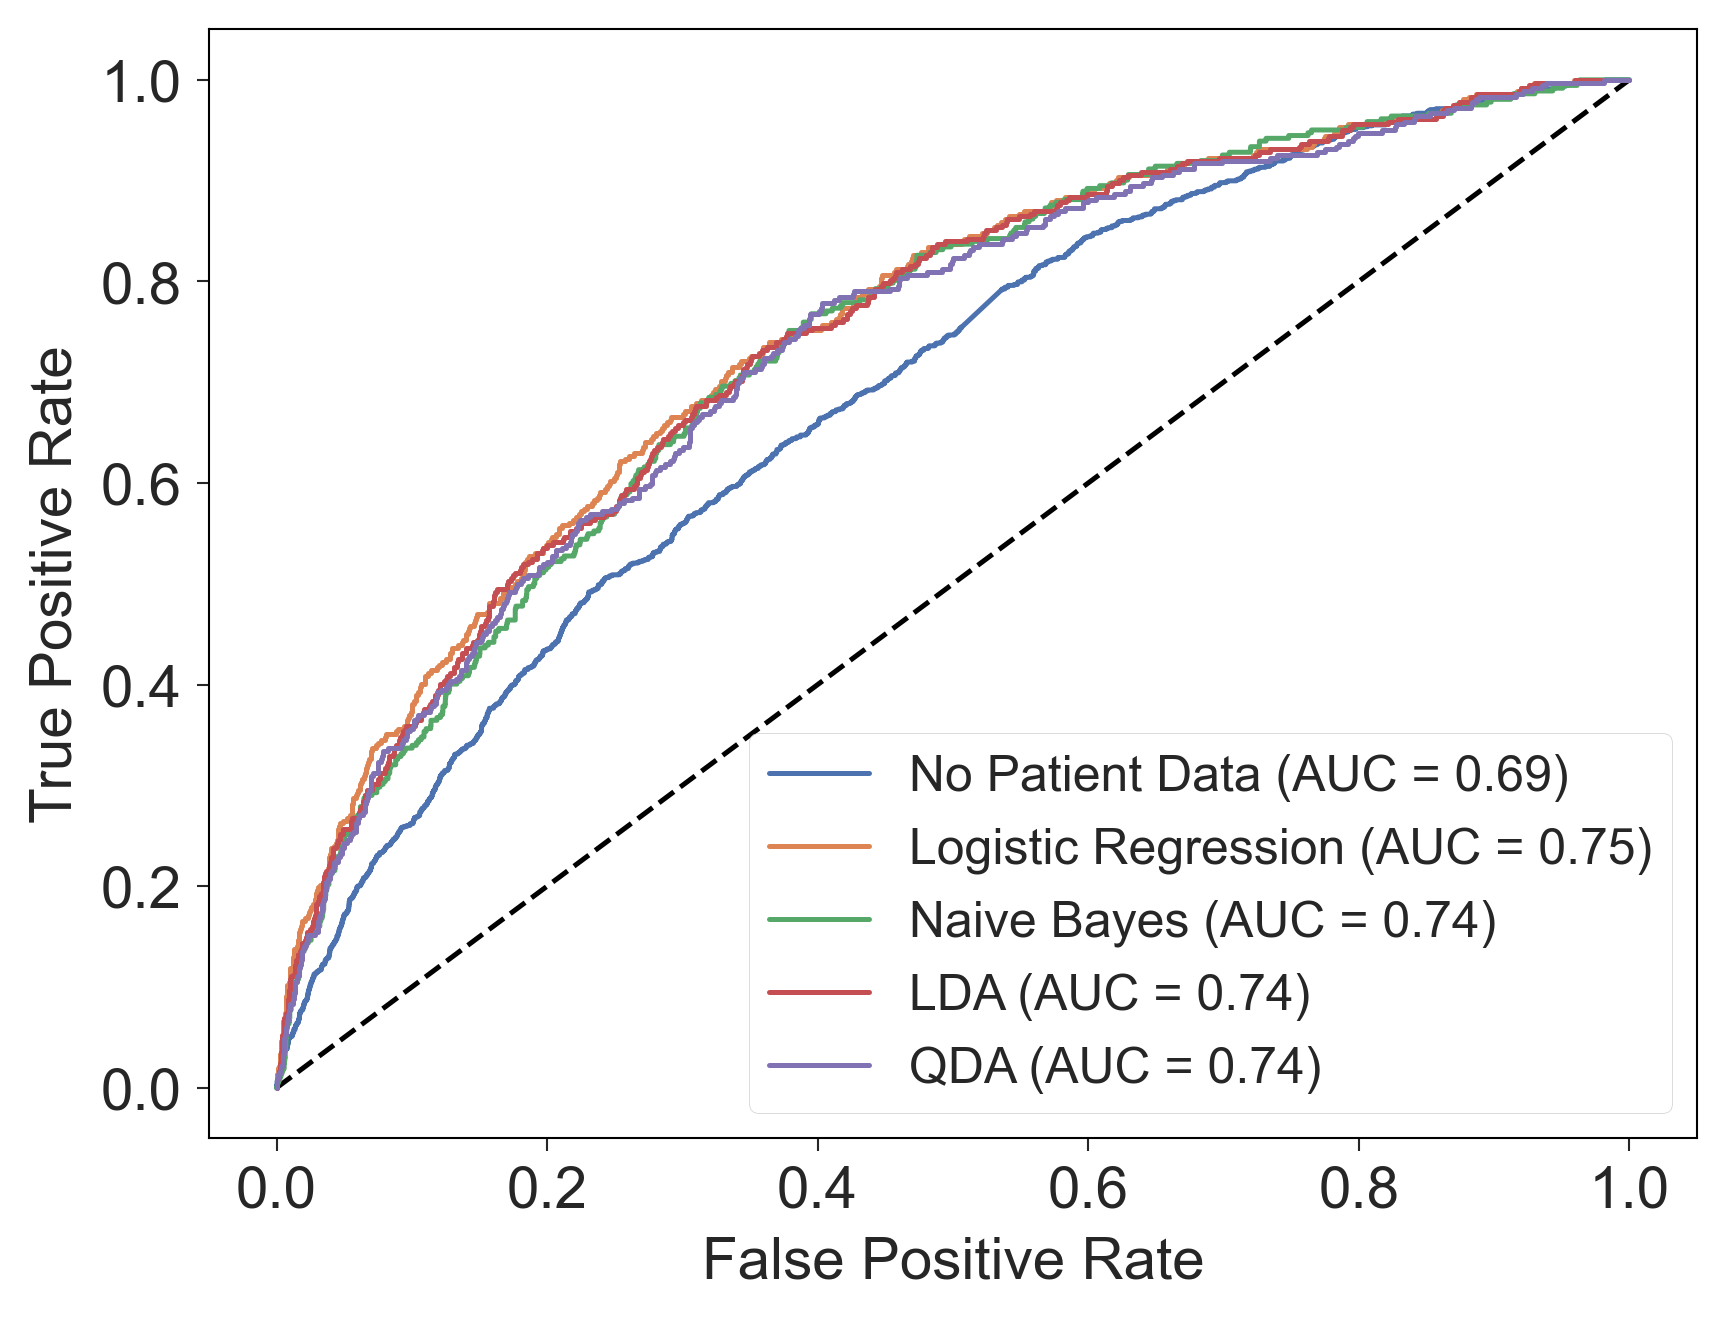

In [71]:
plt.figure(dpi=300)
plt.plot([0,1], [0,1],linestyle='--',color='black')
plt.plot(fpr1, tpr1, label='No Patient Data (AUC = 0.69)')
plt.plot(fpr_glm, tpr_glm, label=f'Logistic Regression (AUC = {score_glm:.2f})')
plt.plot(fpr_NB, tpr_NB, label=f'Naive Bayes (AUC = {score_NB:.2f})')
plt.plot(fpr_LDA, tpr_LDA, label=f'LDA (AUC = {score_LDA:.2f})')
plt.plot(fpr_QDA, tpr_QDA, label=f'QDA (AUC = {score_QDA:.2f})')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')